# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
import seaborn as sns
import re
import string 
import gensim.downloader as api
from autocorrect import Speller
from wordcloud import WordCloud
from emot.emo_unicode import UNICODE_EMO, EMOTICONS, EMOTICONS_EMO
from collections import Counter
from num2words import num2words
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from pycontractions import Contractions
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from cycler import cycler
stop_words = set(stopwords.words('english'))

%matplotlib inline

In [2]:
train1 = pd.read_csv("Corona_NLP_train.csv", delimiter=',', encoding= 'ISO-8859-1')
#test = pd.read_csv("Corona_NLP_test.csv", delimiter=',', encoding= 'ISO-8859-1')
test = pd.read_csv(r'Corona_NLP_test.csv')

data = [train1, test]

train = pd.concat(data)
print(train)

      UserName  ScreenName             Location     TweetAt  \
0         3799       48751               London  16-03-2020   
1         3800       48752                   UK  16-03-2020   
2         3801       48753            Vagabonds  16-03-2020   
3         3802       48754                  NaN  16-03-2020   
4         3803       48755                  NaN  16-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1     advice Talk to your neighbours family to excha...            Positive  
2     Cor

In [3]:
'''from textblob import TextBlob
from sklearn.metrics import confusion_matrix, classification_report

#test['TextBlob']= test['Preprocessed_sentences'].apply(
#    lambda x: TextBlob(x).polarity)

def polarity_to_sentiment(row):
    if row>0.1:
        return 2
    elif row<0.1:
        return 0
    else:
        return 1
print(test['TextBlob'].tail())
test['TextBlob']= test['TextBlob'].apply(polarity_to_sentiment)
print(test['TextBlob'].tail())
def change_values(string):
    if string == "Extremely Negative":
        return 0
    elif string == "Negative":
        return 0
    elif string == "Positive":
        return 2 
    elif string == "Extremely Positive":
        return 2
    elif string == "Neutral":
        return 1 
  
test['Sentiment'] = test['Sentiment'].apply(change_values) 
test_labels = test['Sentiment'].to_numpy()
test_pred_raw = test['TextBlob'].to_numpy()
print(test_labels, test_pred_raw)
confusion_mat = confusion_matrix(test_labels, test_pred_raw )
classification_rep = classification_report(test_labels, test_pred_raw)
print(classification_rep)'''

'from textblob import TextBlob\nfrom sklearn.metrics import confusion_matrix, classification_report\n\n#test[\'TextBlob\']= test[\'Preprocessed_sentences\'].apply(\n#    lambda x: TextBlob(x).polarity)\n\ndef polarity_to_sentiment(row):\n    if row>0.1:\n        return 2\n    elif row<0.1:\n        return 0\n    else:\n        return 1\nprint(test[\'TextBlob\'].tail())\ntest[\'TextBlob\']= test[\'TextBlob\'].apply(polarity_to_sentiment)\nprint(test[\'TextBlob\'].tail())\ndef change_values(string):\n    if string == "Extremely Negative":\n        return 0\n    elif string == "Negative":\n        return 0\n    elif string == "Positive":\n        return 2 \n    elif string == "Extremely Positive":\n        return 2\n    elif string == "Neutral":\n        return 1 \n  \ntest[\'Sentiment\'] = test[\'Sentiment\'].apply(change_values) \ntest_labels = test[\'Sentiment\'].to_numpy()\ntest_pred_raw = test[\'TextBlob\'].to_numpy()\nprint(test_labels, test_pred_raw)\nconfusion_mat = confusion_matr

# Figure: Sentiment of Covid-19 Tweets 

In [4]:
# plot word count distribution for both positive and negative sentiments

'''
class_sentiment = train['Sentiment'].value_counts()
#print(by_day_sentiment)
#plot data
fig, ax = plt.subplots(figsize=(18,8))
colors = ['yellow','red','blue','green', 'orange']
class_sentiment.plot(ax=ax, kind='bar', color=colors, linewidth=2)

# Set title and labels for axes
ax.set(xlabel="Sentiment",
       ylabel="Count",
       title="Sentiment of Covid-19 Tweets during\n02/03/2020- 14/04/2020",
      )
ax.set_xticklabels(labels=class_sentiment.index,
                   rotation=70, rotation_mode="anchor", ha="right")

ax.legend(labels= ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'],
          loc='upper right', frameon=True)

ax.figure.savefig('sentiment_count.png')
'''
#Graph : Sentiment by count
fig = px.bar(train["Sentiment"].value_counts(), 
             color=train["Sentiment"].value_counts(),
             color_continuous_scale=px.colors.sequential.Viridis, 
             log_x=False, labels={'value':'Count', 
                                'index':'',
                                 'color':''
                                })
fig.update_xaxes(
        tickangle = -20)

fig.update_layout(
    font_color="black",
  #  title_font_color="black",
    legend_title_font_color="red",
    title_text="Sentiment of Covid-19 Tweets",
    title_x=0.5
)
fig.write_image("sentiment_count5.png")
fig.show()

In [5]:
def change_values(string):
    if string == "Extremely Negative":
        return "Negative"
    elif string == "Negative":
        return "Negative"
    elif string == "Positive":
        return "Positive" 
    elif string == "Extremely Positive":
        return "Positive"
    elif string == "Neutral":
        return "Neutral" 
    
train['Sentiment'] = train['Sentiment'].apply(change_values)

fig = px.bar(train["Sentiment"].value_counts(), color=train["Sentiment"].value_counts(),
             color_continuous_scale=px.colors.sequential.Viridis, 
             log_x=False, labels={'value':'Count', 
                                'index':'',
                                 'color':''
                                })
fig.update_xaxes(
        tickangle = 0)

fig.update_layout(
    font_color="black",
  #  title_font_color="black",
    legend_title_font_color="red",
    title_text="Sentiment of Covid-19 Tweets",
    title_x=0.5
)
fig.write_image("sentiment_count3.png")
fig.show()

In [6]:
#"Extremely Negative": -1, "Negative": -1, "Neutral": 0, "Positive": 1, "Extremely Positive": 1
'''
def change_values(string):
    if string == "Extremely Negative":
        return 0
    elif string == "Negative":
        return 0
    elif string == "Positive":
        return 2 
    elif string == "Extremely Positive":
        return 2
    elif string == "Neutral":
        return 1 
    
train['Sentiment'] = train['Sentiment'].apply(change_values)'''

'\ndef change_values(string):\n    if string == "Extremely Negative":\n        return 0\n    elif string == "Negative":\n        return 0\n    elif string == "Positive":\n        return 2 \n    elif string == "Extremely Positive":\n        return 2\n    elif string == "Neutral":\n        return 1 \n    \ntrain[\'Sentiment\'] = train[\'Sentiment\'].apply(change_values)'

# Dates

In [7]:
import plotly.graph_objects as go
#print (train['TweetAt'])
date1 = pd.to_datetime(train['TweetAt'], errors='coerce', 
                       format='%d/%m/%Y')
date2 = pd.to_datetime(train['TweetAt'], errors='coerce',
                       format='%d-%m-%Y')
train['TweetAt'] = date1.fillna(date2)
#print (train['TweetAt'])

by_day_sentiment = train.groupby([pd.Grouper
        (key='TweetAt', freq='D'), 'Sentiment'])['Sentiment'] \
        .count().unstack(fill_value=0)

#print(by_day_sentiment)
#plot data
'''fig, ax = plt.subplots(figsize=(18,9))
colors = ["blue", "orange", "red"]
by_day_sentiment.plot(ax=ax, color=colors, linewidth=2)

# Set title and labels for axes
ax.set_title('Sentiment of Covid-19 Tweets during\n02/03/2020- 14/04/2020',
             fontsize= 25) # title of plot

ax.set_xlabel('Date',fontsize = 21) #xlabel
ax.set_ylabel('Count', fontsize = 21)#ylabel
#plt.plot(by_day_sentiment[0], color='red')
# Define the date format

ax.set_xticklabels(labels=by_day_sentiment.index,
                   rotation=60, rotation_mode="anchor", ha="right", fontsize=18)
ax.yaxis.set_tick_params(labelsize=18)
# Ensure a major tick for each day using (interval=1) 
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))
ax.legend(labels= ['Negative', 'Neutral', 'Positive'],
          loc='upper right', frameon=True, fontsize= 'x-large')
ax.grid(True)
ax.figure.savefig('dates.png')
'''
fig = px.line(by_day_sentiment)
# Edit the layout
fig.update_layout(title='Sentiment of Covid-19 Tweets during<br>02/03/2020- 14/04/2020',
                   xaxis_title='Date',
                   yaxis_title='Count',
                   title_x=0.5,
                   height=420,
                   xaxis = {'tickformat': '%d-%m',
                             'nticks': 15
                            })
fig.write_image("dates.png")
fig.show()

# Common words

In [8]:
preproc_train = pd.read_csv("preprocessed_tweets_new.csv", 
                            delimiter=',', encoding= 'ISO-8859-1')
#print(list(preproc_train.columns))
preproc_test = pd.read_csv("test_preprocessed_tweets_new.csv", 
                           delimiter=',', encoding= 'ISO-8859-1')

#preproc_test = preproc_test.drop(['TweetAt'], axis=1)
#print(list(preproc_test.columns))
data2 = [preproc_train, preproc_test]

all_tweets = pd.concat(data2)
print(list(all_tweets.columns))
#print(all_tweets.head())


['Adjectives', 'Adverbs', 'EditedTweet', 'Location', 'Nouns', 'OriginalTweet', 'Others', 'Preprocessed_sentences', 'Sentiment', 'Unnamed: 0', 'UserName', 'Verbs', 'Wordnet_tagged_sent', 'count_excl_quest_marks', 'count_hashtags', 'count_letters', 'count_mentions', 'count_stopwords', 'count_unique_words', 'count_urls', 'count_words', 'count_words_title', 'count_words_upper', 'mean_word_len', 'pos_tagged_sent']


C:\Users\verni\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




[('covid', 11326), ('price', 9430), ('store', 9415), ('food', 8298), ('supermarket', 7935), ('grocery', 7482), ('people', 6578), ('go', 6562), ('consumer', 5255), ('get', 4982), ('..', 4199), ('need', 4004), ('online', 3837), ('time', 3486), ('stock', 3484), ('work', 3282), ('panic', 3034), ('worker', 3024), ('shopping', 2965), ('hand', 2903), ('pandemic', 2846), ('make', 2804), ('help', 2796), ('like', 2746), ('home', 2619), ('demand', 2539), ('shop', 2529), ('take', 2481), ('say', 2479), ('buy', 2464)]


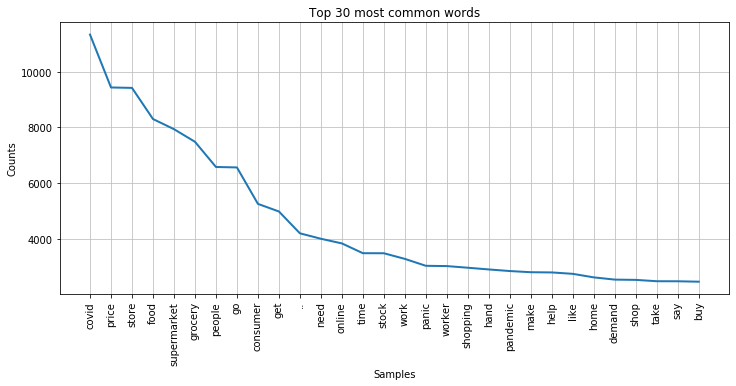

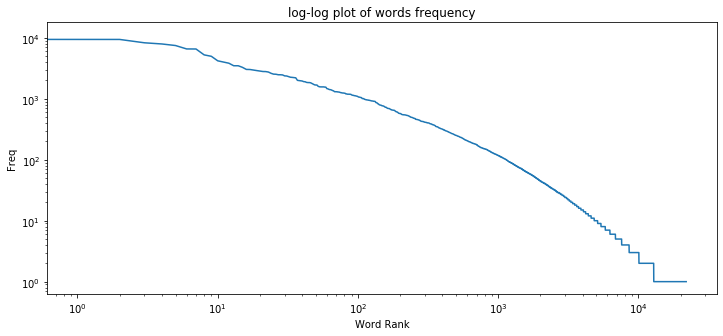

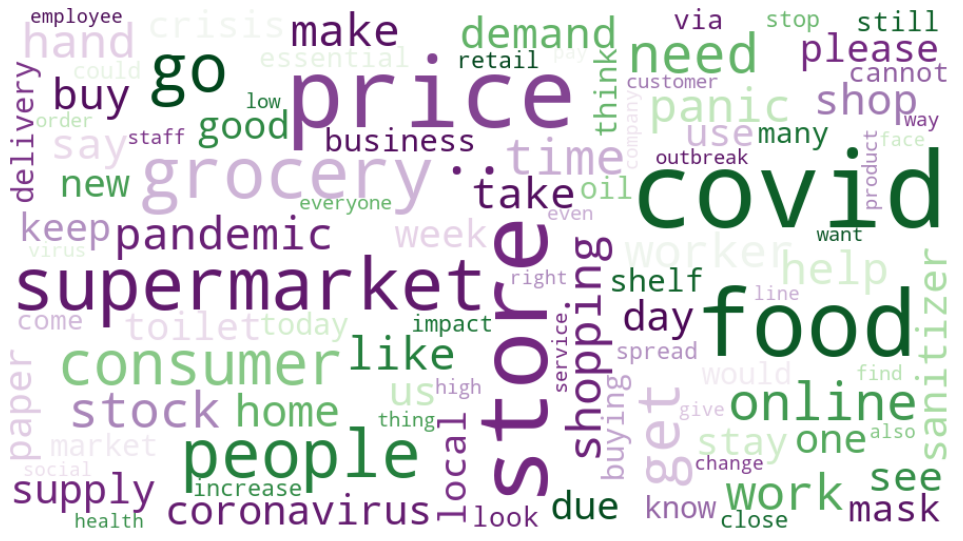

In [9]:

all_tweets = all_tweets.reset_index(drop=True)

new_stopwords = ['<hashtag>', '<number>', '<url>', '<user>', 'amp']
stop_words = stop_words.union(new_stopwords)
all_tweets['testing'] = all_tweets['Preprocessed_sentences'].apply(lambda x: 
                            [item for item in x.split() if item not in 
                             stop_words and item not in string.punctuation])
#print(all_tweets['testing'])
all_tweets['testing2'] = all_tweets['testing'].apply(lambda x:
                                                        " ".join(x))
# most common words in twitter dataset
all_words = []
for line in list(all_tweets['testing2']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())    

# create a word frequency dictionary
wordfreq = Counter(all_words)    
print(wordfreq.most_common(30))

# plot word frequency distribution of first few words
#fig, ax = plt.subplots(figsize=(18,8))
fig, ax= plt.subplots(figsize=(12,5), frameon=True, edgecolor= 'white', facecolor= 'white')
plt.xlabel('Word')
plt.ylabel('Count')
ax.set_facecolor('white')
plt.xticks(rotation = 45)
#ax.tick_params(axis='x', labelrotation = 70)
#plt.xticks(fontsize=13, rotation=70)

plt.title('Top 30 most common words')

fd = nltk.FreqDist(all_words)
fd.plot(30,cumulative=False)
ax.figure.savefig('most_common_words.png')
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)

plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=100,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='PRGn',
                      background_color='white',
                      normalize_plurals=True
                     ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("wordcloud_all_withouthashtag.png")

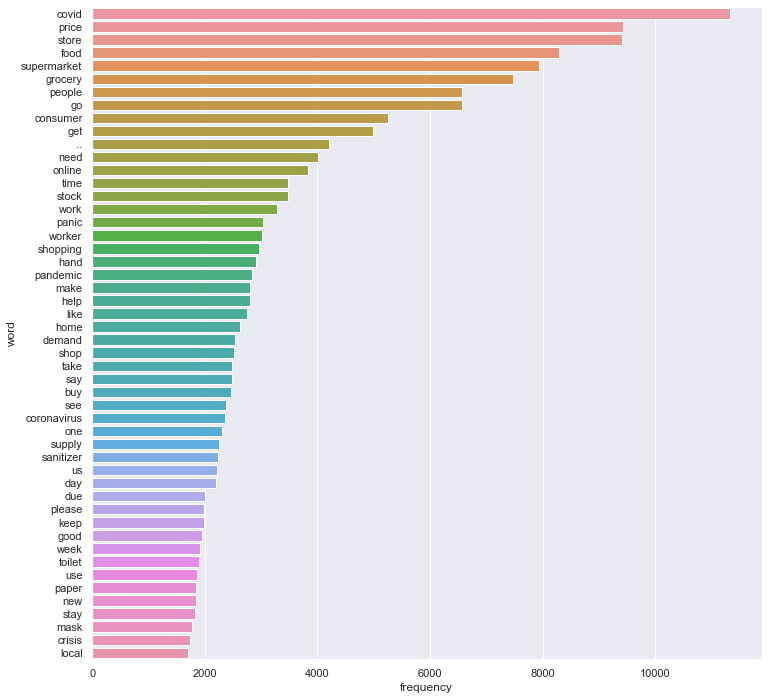

In [10]:
sns.set(style="darkgrid")
counts = Counter(wordfreq).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

# Countries figure

In [11]:
#!pip install datapackage

import datapackage

data_url = 'https://datahub.io/core/world-cities/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        wc = pd.read_csv(resource.descriptor['path'])
        #print (wc)
        
wc = wc.drop(["geonameid"], axis=1)
wc.head()

wc_uae = wc[wc["country"] == "United Arab Emirates"]
wc_usa = wc[wc["country"] == "United States"]
wc_uk = wc[wc["country"] == "United Kingdom"]
wc_can = wc[wc["country"] == "Canada"]
wc_bel = wc[wc["country"] == "Belgium"]
wc_afr = wc[(wc["country"] == "South Africa") | (wc["country"] == "Central African Republic")]
wc_pak = wc[wc["country"] == "Pakistan"]
wc_ind = wc[wc["country"] == "India"]
wc_fra = wc[wc["country"] == "France"]
wc_ger = wc[wc["country"] == "Germany"]
wc_aus = wc[wc["country"] == "Australia"]
wc_chi = wc[wc["country"] == "China"]
wc_nig = wc[wc["country"] == "Nigeria"]
wc_spa = wc[wc["country"] == "Spain"]
wc_arg = wc[wc["country"] == "Argentina"]
wc_swe = wc[wc["country"] == "Sweden"]
wc_mal = wc[wc["country"] == "Malaysia"]
wc_indo = wc[wc["country"] == "Indonesia"]
wc_bra = wc[wc["country"] == "Brazil"]
wc_jap = wc[wc["country"] == "Japan"]
wc_phi = wc[wc["country"] == "Philippines"]
wc_mex = wc[wc["country"] == "Mexico"]
wc_ban = wc[wc["country"] == "Bangladesh"]
wc_eth = wc[wc["country"] == "Ethiopia"]
wc_ita = wc[wc["country"] == "Italy"]
wc_col = wc[wc["country"] == "Colombia"]
wc_egy = wc[wc["country"] == "Egypt"]
wc_rus = wc[wc["country"] == "Russia"]
wc_net = wc[wc["country"] == "Netherlands"]
wc_gre = wc[wc["country"] == "Greece"]
wc_gha = wc[wc["country"] == "Ghana"]
wc_ken = wc[wc["country"] == "Kenya"]
wc_zim = wc[wc["country"] == "Zimbabwe"]
wc_swi = wc[wc["country"] == "Switzerland"]
wc_at = wc[wc["country"] == "Austria"]
wc_tur = wc[wc["country"] == "Turkey"]
wc_cam = wc[wc["country"] == "Cameroon"]
wc_tan = wc[wc["country"] == "Tanzania"]
wc_sud = wc[wc["country"] == "Sudan"]
wc_uga = wc[wc["country"] == "Uganda"]
wc_tha = wc[wc["country"] == "Thailand"]
wc_fij = wc[wc["country"] == "Fiji"]
wc_con = wc[wc["country"] == "Congo"]
wc_ir = wc[wc["country"] == "Iran"]
wc_po = wc[wc["country"] == "Poland"]
wc_cl = wc[wc["country"] == "Chile"]
wc_grn = wc[wc["country"] == "Greenland"]
wc_prt = wc[wc["country"] == "Portugal"]
wc_hk = wc[wc["country"] == "Hong Kong"]
wc_fin = wc[wc["country"] == "Finland"]
wc_ice = wc[wc["country"] == "Iceland"]
wc_cub = wc[wc["country"] == "Cuba"]
wc_nor = wc[wc["country"] == "Norway"]
wc_ire = wc[wc["country"] == "Ireland"]
wc_mon = wc[wc["country"] == "Mongolia"]
wc_afg = wc[wc["country"] == "Afghanistan"]
wc_mad = wc[wc["country"] == "Madagascar"]
wc_per = wc[wc["country"] == "Peru"]
wc_bol = wc[wc["country"] == "Bolivia"]
wc_viet = wc[wc["country"] == "Vietnam"]
wc_kaz = wc[wc["country"] == "Kazakhstan"]

def encoding_location(item):    
    for i in wc_uae["name"]:
        if str(i) in str(item) or "United Arab Emirates" in str(item):
            return "United Arab Emirates"
    for i in wc_uae["subcountry"]:
        if str(i) in str(item):
            return "United Arab Emirates"
    for i in wc_kaz["name"]:
        if str(i) in str(item) or "Kazakhstan" in str(item):
            return "Kazakhstan"
    for i in wc_kaz["subcountry"]:
        if str(i) in str(item):
            return "Kazakhstan"
    for i in wc_viet["name"]:
        if str(i) in str(item) or "Vietnam" in str(item):
            return "Vietnam"
    for i in wc_viet["subcountry"]:
        if str(i) in str(item):
            return "Vietnam"
    for i in wc_per["name"]:
        if str(i) in str(item) or "Peru" in str(item):
            return "Peru"
    for i in wc_per["subcountry"]:
        if str(i) in str(item):
            return "Peru"
    for i in wc_bol["name"]:
        if str(i) in str(item) or "Bolivia" in str(item):
            return "Bolivia"
    for i in wc_bol["subcountry"]:
        if str(i) in str(item):
            return "Bolivia"
    for i in wc_mad["name"]:
        if str(i) in str(item) or "Madagascar" in str(item):
            return "Madagascar"
    for i in wc_mad["subcountry"]:
        if str(i) in str(item):
            return "Madagascar"
    for i in wc_afg["name"]:
        if str(i) in str(item) or "Afghanistan" in str(item):
            return "Afghanistan"
    for i in wc_afg["subcountry"]:
        if str(i) in str(item):
            return "Afghanistan"
    for i in wc_mon["name"]:
        if str(i) in str(item) or "Mongolia" in str(item):
            return "Mongolia"
    for i in wc_mon["subcountry"]:
        if str(i) in str(item):
            return "Mongolia"
    for i in wc_ire["name"]:
        if str(i) in str(item) or "Ireland" in str(item):
            return "Ireland"
    for i in wc_ire["subcountry"]:
        if str(i) in str(item):
            return "Ireland"
    for i in wc_nor["name"]:
        if str(i) in str(item) or "Norway" in str(item):
            return "Norway"
    for i in wc_nor["subcountry"]:
        if str(i) in str(item):
            return "Norway"
    for i in wc_cub["name"]:
        if str(i) in str(item) or "Cuba" in str(item):
            return "Cuba"
    for i in wc_cub["subcountry"]:
        if str(i) in str(item):
            return "Cuba"
    for i in wc_ice["name"]:
        if str(i) in str(item) or "Iceland" in str(item):
            return "Iceland"
    for i in wc_ice["subcountry"]:
        if str(i) in str(item):
            return "Iceland"
    for i in wc_fin["name"]:
        if str(i) in str(item) or "Finland" in str(item):
            return "Finland"
    for i in wc_fin["subcountry"]:
        if str(i) in str(item):
            return "Finland"
    for i in wc_hk["name"]:
        if str(i) in str(item) or "Hong Kong" in str(item):
            return "Hong Kong"
    for i in wc_hk["subcountry"]:
        if str(i) in str(item):
            return "Hong Kong"
    for i in wc_prt["name"]:
        if str(i) in str(item) or "Portugal" in str(item):
            return "Portugal"
    for i in wc_prt["subcountry"]:
        if str(i) in str(item):
            return "Portugal"
    for i in wc_cl["name"]:
        if str(i) in str(item) or "Chile" in str(item):
            return "Chile"
    for i in wc_cl["subcountry"]:
        if str(i) in str(item):
            return "Chile"
    for i in wc_po["name"] :
        if str(i) in str(item) or "Poland" in str(item):
            return "Poland"
    for i in wc_po["subcountry"]:
        if str(i) in str(item):
            return "Poland"
    for i in wc_ir["name"]:
        if str(i) in str(item) or "Iran" in str(item):
            return "Iran"
    for i in wc_ir["subcountry"]:
        if str(i) in str(item):
            return "Iran"
    for i in wc_con["name"]:
        if str(i) in str(item) or "Congo" in str(item):
            return "Congo"
    for i in wc_con["subcountry"]:
        if str(i) in str(item):
            return "Congo"
    for i in wc_fij["name"]:
        if str(i) in str(item) or "Fiji" in str(item):
            return "Fiji"
    for i in wc_fij["subcountry"]:
        if str(i) in str(item):
            return "Fiji"
    for i in wc_tha["name"]:
        if str(i) in str(item) or "Thailand" in str(item):
            return "Thailand"
    for i in wc_tha["subcountry"]:
        if str(i) in str(item):
            return "Thailand"
    for i in wc_uga["name"]:
        if str(i) in str(item) or "Uganda" in str(item):
            return "Uganda"
    for i in wc_uga["subcountry"]:
        if str(i) in str(item):
            return "Uganda"
    for i in wc_sud["name"]:
        if str(i) in str(item) or "Sudan" in str(item):
            return "Sudan"
    for i in wc_sud["subcountry"]:
        if str(i) in str(item):
            return "Sudan"
    for i in wc_tan["name"]:
        if str(i) in str(item) or "Tanzania" in str(item):
            return "Tanzania"
    for i in wc_tan["subcountry"]:
        if str(i) in str(item):
            return "Tanzania"
    for i in wc_cam["name"]:
        if str(i) in str(item) or "Cameroon" in str(item):
            return "Cameroon"
    for i in wc_cam["subcountry"]:
        if str(i) in str(item):
            return "Cameroon"
    for i in wc_at["name"]:
        if str(i) in str(item) or "Austria" in str(item):
            return "Austria"
    for i in wc_at["subcountry"]:
        if str(i) in str(item):
            return "Austria"
    for i in wc_swi["name"]:
        if str(i) in str(item) or "Switzerland" in str(item):
            return "Switzerland"
    for i in wc_swi["subcountry"]:
        if str(i) in str(item):
            return "Switzerland"
    for i in wc_zim["name"]:
        if str(i) in str(item) or "Zimbabwe" in str(item):
            return "Zimbabwe"
    for i in wc_zim["subcountry"]:
        if str(i) in str(item):
            return "Zimbabwe"
    for i in wc_ken["name"]:
        if str(i) in str(item) or "Kenya" in str(item):
            return "Kenya"
    for i in wc_ken["subcountry"]:
        if str(i) in str(item):
            return "Kenya"
    for i in wc_gha["name"]:
        if str(i) in str(item) or "Ghana" in str(item):
            return "Ghana"
    for i in wc_gha["subcountry"]:
        if str(i) in str(item):
            return "Ghana"
    for i in wc_gre["name"]:
        if str(i) in str(item) or "Greece" in str(item):
            return "Greece"
    for i in wc_gre["subcountry"]:
        if str(i) in str(item):
            return "Greece"
    for i in wc_net["name"]:
        if str(i) in str(item) or "Netherlands" in str(item):
            return "Netherlands"
    for i in wc_net["subcountry"]:
        if str(i) in str(item):
            return "Netherlands"
    for i in wc_rus["name"]:
        if str(i) in str(item) or "Russia" in str(item):
            return "Russia"
    for i in wc_rus["subcountry"]:
        if str(i) in str(item):
            return "Russia"
    for i in wc_egy["name"]:
        if str(i) in str(item) or "Egypt" in str(item):
            return "Egypt"
    for i in wc_egy["subcountry"]:
        if str(i) in str(item):
            return "Egypt"
    for i in wc_col["name"]:
        if str(i) in str(item) or "Colombia" in str(item):
            return "Colombia"
    for i in wc_col["subcountry"]:
        if str(i) in str(item):
            return "Colombia"
    for i in wc_ita["name"]:
        if str(i) in str(item) or "Italy" in str(item):
            return "Italy"
    for i in wc_ita["subcountry"]:
        if str(i) in str(item):
            return "Italy"
    for i in wc_eth["name"]:
        if str(i) in str(item) or "Ethiopia" in str(item):
            return "Ethiopia"
    for i in wc_eth["subcountry"]:
        if str(i) in str(item):
            return "Ethiopia"
    for i in wc_ban["name"]:
        if str(i) in str(item) or "Bangladesh" in str(item):
            return "Bangladesh"
    for i in wc_ban["subcountry"]:
        if str(i) in str(item):
            return "Bangladesh"
    for i in wc_mex["name"]:
        if str(i) in str(item) or "Mexico" in str(item):
            return "Mexico"
    for i in wc_mex["subcountry"]:
        if str(i) in str(item):
            return "Mexico"
    for i in wc_phi["name"]:
        if str(i) in str(item) or "Philippines" in str(item):
            return "Philippines"
    for i in wc_phi["subcountry"]:
        if str(i) in str(item):
            return "Philippines"
    for i in wc_jap["name"]:
        if str(i) in str(item) or "Japan" in str(item):
            return "Japan"
    for i in wc_jap["subcountry"]:
        if str(i) in str(item):
            return "Japan"
    for i in wc_bra["name"]:
        if str(i) in str(item) or "Brazil" in str(item):
            return "Brazil"
    for i in wc_bra["subcountry"]:
        if str(i) in str(item):
            return "Brazil"
    for i in wc_tur["name"]:
        if str(i) in str(item) or "Turkey" in str(item):
            return "Turkey"
    for i in wc_tur["subcountry"]:
        if str(i) in str(item):
            return "Turkey"
    if str(wc_usa["name"]) in str(item):
        return "USA"
    for i in wc_usa["name"]:
        if str(i) in str(item):
            return "USA"
    for i in wc_usa["subcountry"]:
        if str(i) in str(item):
            return "USA"
    for i in wc_uk["name"]:
        if str(i) in str(item):
            return "UK"
    for i in wc_uk["subcountry"]:
        if str(i) in str(item):
            return "UK"
    for i in wc_can["name"]:
        if str(i) in str(item):
            return "Canada"
    for i in wc_can["subcountry"]:
        if str(i) in str(item):
            return "Canada"
    for i in wc_afr["name"]:
        if str(i) in str(item):
            return "South Africa"
    for i in wc_afr["subcountry"]:
        if str(i) in str(item):
            return "South Africa"
    for i in wc_swe["name"]:
        if str(i) in str(item) or "Sweden" in str(item):
            return "Sweden"
    for i in wc_swe["subcountry"]:
        if str(i) in str(item):
            return "Sweden"
    for i in wc_indo["name"]:
        if str(i) in str(item) or "Indonesia" in str(item):
            return "Indonesia"
    for i in wc_indo["subcountry"]:
        if str(i) in str(item):
            return "Indonesia"
    for i in wc_mal["name"]:
        if str(i) in str(item) or "Malaysia" in str(item):
            return "Malaysia"
    for i in wc_mal["subcountry"]:
        if str(i) in str(item):
            return "Malaysia"
    for i in wc_ind["name"]:
        if str(i) in str(item) or "India" in str(item):
            return "India"
    for i in wc_ind["subcountry"]:
        if str(i) in str(item):
            return "India"
    for i in wc_pak["name"]:
        if str(i) in str(item) or "Pakistan" in str(item):
            return "Pakistan"
    for i in wc_pak["subcountry"]:
        if str(i) in str(item):
            return "Pakistan"
    for i in wc_fra["name"]:
        if str(i) in str(item):
            return "France"
    for i in wc_fra["subcountry"]:
        if str(i) in str(item):
            return "France"
    for i in wc_ger["name"]:
        if str(i) in str(item):
            return "Germany"
    for i in wc_ger["subcountry"]:
        if str(i) in str(item):
            return "Germany"
    for i in wc_aus["name"]:
        if str(i) in str(item) or "Australia" in str(item):
            return "Australia"
    for i in wc_aus["subcountry"]:
        if str(i) in str(item):
            return "Australia"
    for i in wc_chi["name"]:
        if str(i) in str(item) or "Chile" in str(item):
            return "Chile"
    for i in wc_chi["subcountry"]:
        if str(i) in str(item):
            return "Chile"
    for i in wc_nig["name"]:
        if str(i) in str(item) or "Nigeria" in str(item):
            return "Nigeria"
    for i in wc_nig["subcountry"]:
        if str(i) in str(item):
            return "Nigeria"
    for i in wc_spa["name"]:
        if str(i) in str(item) or "Spain" in str(item):
            return "Spain"
    for i in wc_spa["subcountry"]:
        if str(i) in str(item):
            return "Spain"
    for i in wc_bel["name"]:
        if str(i) in str(item) or "Belgium" in str(item):
            return "Belgium"
    for i in wc_bel["subcountry"]:
        if str(i) in str(item):
            return "Belgium"
    for i in wc_arg["name"]:
        if str(i) in str(item) or "Argentina" in str(item):
            return "Argentina"
    for i in wc_arg["subcountry"]:
        if str(i) in str(item):
            return "Argentina"
    for i in wc_grn["name"]:
        if str(i) in str(item) or "Greenland" in str(item):
            return "Greenland"
    for i in wc_grn["subcountry"]:
        if str(i) in str(item):
            return "Greenland"
    #for i in wc["country"]:
       # if str(i) not in str(item):
       #     return "Other"
    if "World" in str(item) or "Here" in str(item) \
    or "Global" in str(item) or "everywhere" in str(item) \
    or "Everywhere" in str(item) or "Nowhere" in str(item) \
    or "Earth" in str(item) or "Around the world" in str(item) \
    or "WORLDWIDE" in str(item) or "Nationwide" in str(item) \
    or "worldwide" in str(item) or "earth" in str(item) \
    or "Planet " in str(item) or "global" in str(item):
        return "GLO"
    elif "France" in str(item):
        return "France"
    elif "Australia" in str(item):
        return "Australia"
    elif "Africa" in str(item):
        return "Africa"
    elif "NYC" in str(item) or "NY" in str(item) or "Silicon Valley" in str(item) \
    or "San Antonio" in str(item) or "NJ" in str(item) or "LA" in str(item) \
    or "DC" in str(item) or "U.S.A" in str(item) or "TX" in str(item) or "usa" in str(item) \
    or "Bay Area" in str(item) or "CA" in str(item) or "St Louis" in str(item):
        return "USA"
    elif "USA" in str(item) or "US" in str(item) or "FL" in str(item):
        return "USA"
    elif "Canada" in str(item):
        return "Canada"
    elif "Germany" in str(item) or "Deutschland" in str(item):
        return "Germany"
    elif "UK" in str(item) or "uk" in str(item) \
    or "london" in str(item):
        return "UK"
    elif "Pakistan" in str(item):
        return "Pakistan"
    elif "INDIA" in str(item):
        return "India"
    elif "Kenya" in str(item):
        return "Kenya"
    elif "Ireland" in str(item):
        return "Ireland"
    elif "New Zealand" in str(item):
        return "New Zealand"
    elif "China" in str(item):
        return "China"
    elif "Denmark" in str(item):
        return "Denmark"
    elif "Sweden" in str(item):
        return "Sweden"
    elif "Italy" in str(item) or "Rome" in str(item) \
    or "Roma" in str(item) or "Italia" in str(item) :
        return "Italy"
    elif "xico" in str(item):
        return "Mexico"
    elif "Singapore" in str(item):
        return "Singapore"
    elif "Philippines" in str(item):
        return "Philippines"
    elif "Belgium" in str(item):
        return "Belgium"
    elif "Ghana" in str(item):
        return "Ghana"
    elif "Spain" in str(item):
        return "Spain"
    elif "Malaysia" in str(item):
        return "Malaysia"
    else:
        return 'Other'
    
#train['Location'].replace('', np.nan, inplace=True)
#train.dropna(subset=['Location'], inplace=True)
train3 = train[train['Location'].notna()]
train3["Location2"] = train3["Location"].apply(encoding_location)
'''train.Location2.replace(np.nan, 'Other', regex=True, inplace=True)'''

C:\Users\verni\Anaconda3\lib\site-packages\ipykernel_launcher.py:521: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



"train.Location2.replace(np.nan, 'Other', regex=True, inplace=True)"

In [12]:
#Graph : Country by tweets
print(train3["Location2"].value_counts(ascending=True))
fig = px.bar(train3["Location2"].value_counts()[:10],
             orientation="v",
             color=train3["Location2"].value_counts()[:10],
             color_continuous_scale=px.colors.sequential.Viridis, 
             log_x=False, labels={'value':'Count', 
                                'index':'',
                                 'color':''
                                })

fig.update_layout(
    font_color="black",
    title_font_color="black",
    legend_title_font_color="black",
    title_text="Τweet Count by Country",
    title_x=0.5
)
fig.write_image("countries_tweet_count.png")
fig.show()
print(train3["Location2"].value_counts()[240:300])

print(wc.country.unique())

Afghanistan        9
Vietnam           11
Iran              11
Madagascar        13
Kazakhstan        16
               ...  
Ghana           1595
India           2754
UK              3503
Other           5296
USA            12066
Name: Location2, Length: 64, dtype: int64


Series([], Name: Location2, dtype: int64)
['Andorra' 'United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda'
 'Anguilla' 'Albania' 'Armenia' 'Angola' 'Argentina' 'American Samoa'
 'Austria' 'Australia' 'Aruba' 'Aland Islands' 'Azerbaijan'
 'Bosnia and Herzegovina' 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso'
 'Bulgaria' 'Bahrain' 'Burundi' 'Benin' 'Saint Barthelemy' 'Bermuda'
 'Brunei' 'Bolivia' 'Bonaire, Saint Eustatius and Saba ' 'Brazil'
 'Bahamas' 'Bhutan' 'Botswana' 'Belarus' 'Belize' 'Canada' 'Cocos Islands'
 'Democratic Republic of the Congo' 'Central African Republic'
 'Republic of the Congo' 'Switzerland' 'Ivory Coast' 'Cook Islands'
 'Chile' 'Cameroon' 'China' 'Colombia' 'Costa Rica' 'Cuba' 'Cape Verde'
 'Curacao' 'Christmas Island' 'Cyprus' 'Czech Republic' 'Germany'
 'Djibouti' 'Denmark' 'Dominica' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Estonia' 'Egypt' 'Western Sahara' 'Eritrea' 'Spain' 'Ethiopia' 'Finland'
 'Fiji' 'Falkland Islands' 'Micronesia' 'Faroe Islands'

In [13]:
import plotly.graph_objects as go
top_countries = ["USA", "UK", "India", "Ghana"]
train2= train3.loc[train3['Location2'].isin(top_countries)]


group = train2.groupby(['Location2', 'Sentiment']). \
        size().reset_index(name='count') 

fig= px.bar(group, x='Location2', y='count', color='Sentiment',
            log_x=False, barmode='stack',
            labels={'count':'Count', 'Location2':''})

fig.update_layout(
    xaxis_categoryorder = 'total descending',
    font_color="black",
    title_font_color="black",
    legend_title_font_color="black",
    title_text="Top Countries Sentiment related to Covid-19",
    title_x=0.5
)
fig.write_image("top_countries_sentiment.png")
#fig.show()

import plotly.express as px
def change_values2(string):
    if string == "Negative":
        return 0
    elif string == "Positive":
        return 2
    elif string == "Neutral":
        return 1 
train3['Sentiment2'] = train3['Sentiment'].apply(change_values2)
n0 = train3['Sentiment2'].value_counts()[0]
n1 = train3['Sentiment2'].value_counts()[1]
n2 = train3['Sentiment2'].value_counts()[2]
n = n0 + n1 +n2

p0 = n0 / n
p1 = n1 / n 
p2 = n2 / n
#print("Probability a priori for class\t Negative : {}\t Neutral : {}\t Positive: {}".format(
#     round(p0, 3), round(p1, 3), round(p2, 3)))
def change_values3(string):
    if string == 0:
        return "Negative"
    elif string == 1:
        return "Neutral"
    elif string == 2:
        return "Positive" 

group2 = train3.groupby(['Location2'])['Sentiment2']. \
       median().reset_index(name='count2')
group2['count2'] = group2['count2'].apply(change_values3)
print(group2.sort_values('count2'))

fig = px.choropleth(group2,
                   locations=group2["Location2"],
                    locationmode = 'country names',
                    color="count2", # lifeExp is a column of gapminder
                    hover_name="Location2", # column to add to hover information\
                    category_orders={
                      'count2' : [
                          'Negative',
                          'Neutral',
                          'Positive',
                      ]
                    },
                   labels={'count2':''}
                    )
fig.update_layout(
    title_text = 'Sentiment per Country',
    title_x=0.5
)
fig.update_geos(projection_type="natural earth")
fig.write_image("sentiment_per_country.png")
fig.show()

     Location2    count2
16       Egypt  Negative
17    Ethiopia  Negative
60      Uganda  Negative
26     Iceland  Negative
38    Mongolia  Negative
..         ...       ...
48    Portugal  Positive
36    Malaysia  Positive
33  Kazakhstan  Positive
12       China  Positive
47      Poland  Positive

[64 rows x 2 columns]


C:\Users\verni\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Tweet charts

In [14]:
# "Number of Characters in Tweets per Sentiment",
import plotly.graph_objects as go
from plotly.subplots import make_subplots
tweet_len0=train[train['Sentiment']=="Negative"]['OriginalTweet'].str.len()
tweet_len1=train[train['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
tweet_len2=train[train['Sentiment']=="Positive"]['OriginalTweet'].str.len()

fig = go.Figure()


fig.add_trace(go.Histogram(x=tweet_len0, 
                           name = 'Negative',
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=70,
                                size=2
                            )))
fig.add_trace(go.Histogram(x=tweet_len1,
                           name = 'Neutral', 
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=70,
                                size=2
                            )))
fig.add_trace(go.Histogram(x=tweet_len2, 
                           name = 'Positive',
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=70,
                                size=2
                            )))
fig.update_layout( 
                  title_text="Number of Characters in Tweets per Sentiment",
                  title_x=0.5,
                  bargap=0.2, # gap between bars of adjacent location coordinates
                  bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.write_image("Characters_per_Tweet.png")
fig.show()

In [15]:
#"Number of Words in Tweets per Sentiment",
tweet_len0=train[train['Sentiment']=="Negative"]['OriginalTweet'].str.split().map(lambda x: len(x))
tweet_len1=train[train['Sentiment']=="Neutral"]['OriginalTweet'].str.split().map(lambda x: len(x))
tweet_len2=train[train['Sentiment']=="Positive"]['OriginalTweet'].str.split().map(lambda x: len(x))
print(tweet_len0.mean(), tweet_len1.mean(), tweet_len2.mean())
fig = go.Figure()


fig.add_trace(go.Histogram(x=tweet_len0, 
                           name = 'Negative',
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=70,
                                size=2
                            )))
fig.add_trace(go.Histogram(x=tweet_len1,
                           name = 'Neutral', 
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=70,
                                size=2
                            )))
fig.add_trace(go.Histogram(x=tweet_len2, 
                           name = 'Positive',
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=70,
                                size=2
                            )))
fig.update_layout( 
                  title_text="Number of Words in Tweets per Sentiment",
                  title_x=0.5,
                  bargap=0.2, # gap between bars of adjacent location coordinates
                  bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.write_image("Words_per_Tweet.png")
fig.show()

32.247959603076744 23.196591454632742 32.55425683952634


In [16]:
#Average word length in a tweet

word0=train[train['Sentiment']=="Negative"] \
    ['OriginalTweet'].str.split().apply(
    lambda x : [len(i) for i in x])
print(word0)
word0 = word0.map(lambda x: np.mean(x))
print(word0)
word1=train[train['Sentiment']=="Neutral"] \
    ['OriginalTweet'].str.split().apply(
    lambda x : [len(i) for i in x])
word1 = word1.map(lambda x: np.mean(x))
word2=train[train['Sentiment']=="Positive"] \
    ['OriginalTweet'].str.split().apply(
    lambda x : [len(i) for i in x])
word2 = word2.map(lambda x: np.mean(x))
fig = go.Figure()


fig.add_trace(go.Histogram(x=word0, 
                           name = 'Negative',
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=25,
                                size=0.5
                            )))
fig.add_trace(go.Histogram(x=word1,
                           name = 'Neutral', 
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=25,
                                size=0.5
                            )))
fig.add_trace(go.Histogram(x=word2, 
                           name = 'Positive',
                           xbins=dict( # bins used for histogram
                                start=0,
                                end=25,
                                size=0.5
                            )))
fig.update_layout( 
                  title_text="Average word length in each tweet",
                  title_x=0.5,
                  bargap=0.2, # gap between bars of adjacent location coordinates
                  bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.write_image("avg_word_length.png")
fig.show()

4       [3, 5, 2, 2, 2, 11, 6, 3, 8, 9, 3, 7, 3, 9, 3,...
9       [3, 6, 13, 6, 4, 2, 3, 6, 4, 3, 4, 3, 6, 3, 6,...
20      [4, 3, 7, 8, 4, 5, 2, 3, 5, 4, 3, 4, 4, 4, 5, ...
24      [16, 12, 4, 2, 5, 4, 2, 6, 4, 3, 5, 9, 8, 3, 5...
26      [2, 11, 3, 6, 6, 3, 1, 9, 4, 9, 3, 6, 9, 9, 2,...
                              ...                        
3787    [3, 5, 6, 3, 5, 6, 5, 3, 5, 4, 5, 3, 4, 6, 3, ...
3791    [4, 3, 7, 12, 4, 3, 5, 11, 5, 4, 2, 5, 6, 4, 2...
3792    [13, 11, 6, 4, 3, 4, 2, 3, 7, 8, 2, 5, 1, 5, 4...
3794    [3, 3, 5, 3, 1, 3, 2, 14, 6, 4, 5, 4, 10, 2, 2...
3796    [3, 4, 2, 2, 10, 7, 2, 4, 2, 6, 6, 10, 2, 2, 4...
Name: OriginalTweet, Length: 17031, dtype: object
4       6.525000
9       5.380952
20      4.682927
24      5.564103
26      6.250000
          ...   
3787    6.090909
3791    5.581395
3792    6.241379
3794    5.294118
3796    5.034483
Name: OriginalTweet, Length: 17031, dtype: float64


# Common hashtags/mentions

In [17]:
def hash_finder(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)

train['hash'] = train['OriginalTweet'].apply(lambda x:hash_finder(x))

#Graph : Hashtags by count (without tweet withtout #)
fig = px.bar(train['hash'].value_counts()[1:15], orientation="v", 
             color=train['hash'].value_counts()[1:15], 
             color_continuous_scale=px.colors.sequential.Viridis, 
             log_y=True, labels={'value':'Count', 
                                'index':'',
                                 'color':''
                                })
fig.update_xaxes(
        tickangle = -25)
fig.update_layout(
    font_color="black",
    title_font_color="black",
    legend_title_font_color="green",
    title_text="Most common Hashtags",
    title_x=0.5
)
fig.write_image("common_hashtags.png")
fig.show()

In [18]:
def mentions_finder(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)

train['mention'] = train['OriginalTweet'].apply(
    lambda x: mentions_finder(x))

#Graph : Mentions by count (without tweet withtout #)
fig = px.bar(train['mention'].value_counts()[1:15],
             orientation="v", 
             color=train['mention'].value_counts()[1:15], 
             color_continuous_scale=px.colors.sequential.Viridis, 
             log_y=True, labels={'value':'Count', 
                                'index':'',
                                 'color':''
                                })
fig.update_xaxes(
        tickangle = -25)

fig.update_layout(
    font_color="black",
    title_font_color="black",
    legend_title_font_color="green",
    title_text="Most common Mentions",
    title_x=0.5
)
fig.write_image("common_mentions.png")
fig.show()

# Common uni/bi/trigrams

C:\Users\verni\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




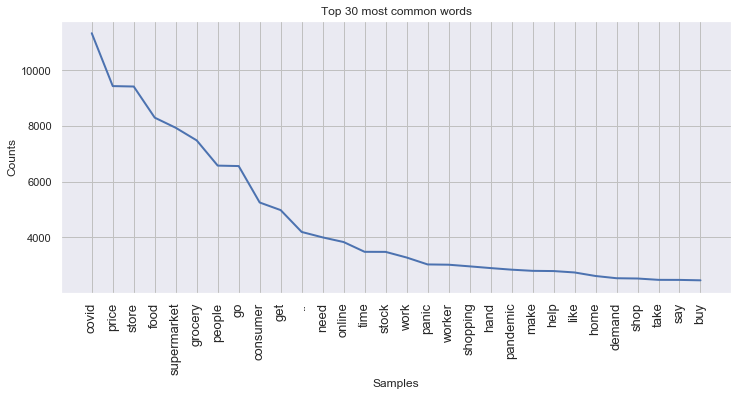

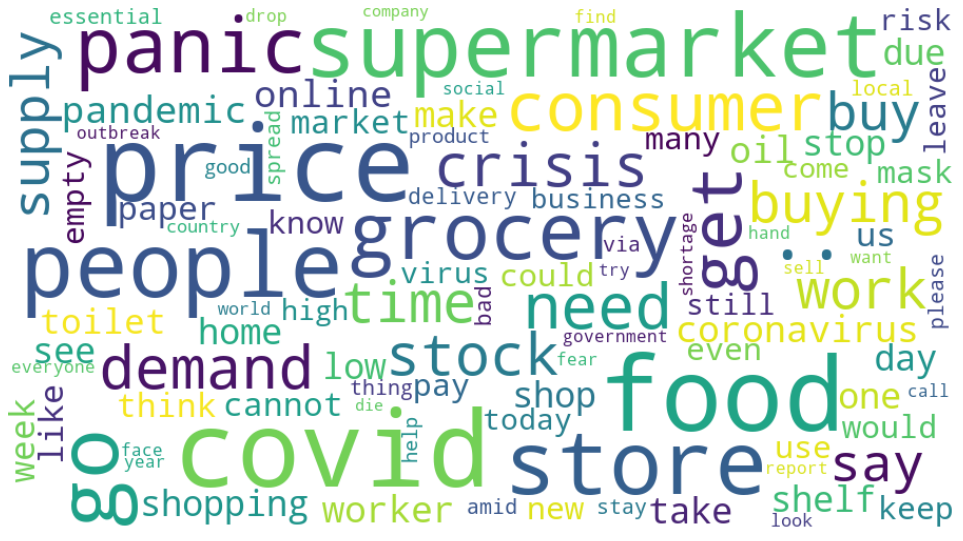

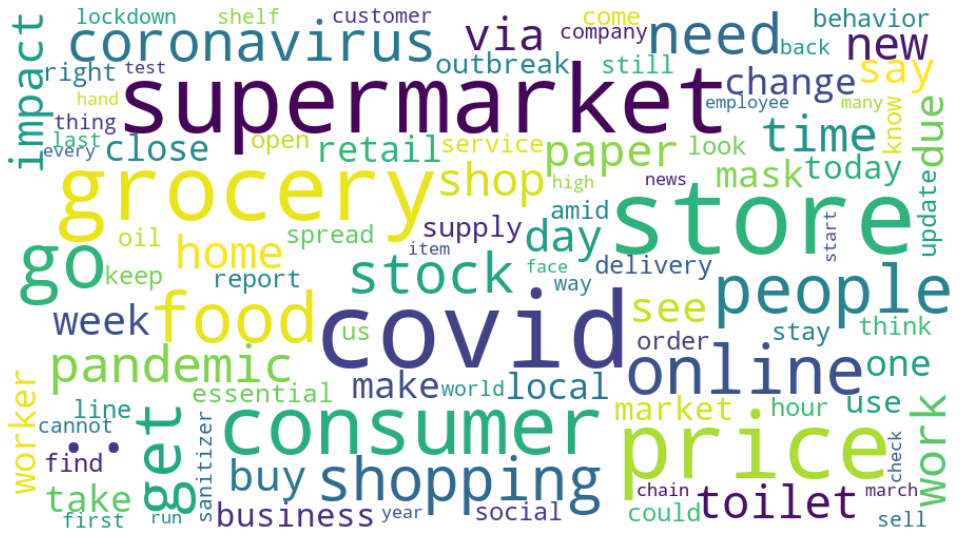

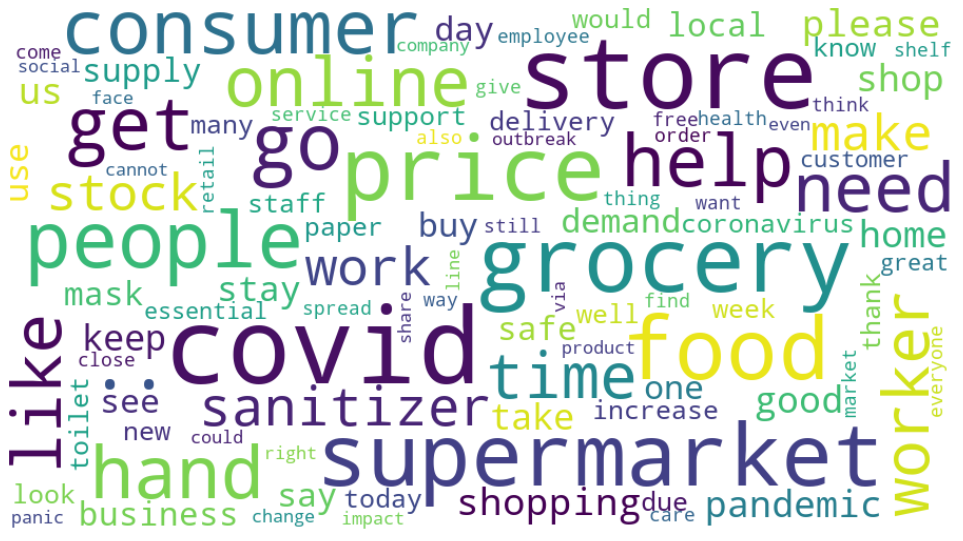

In [19]:
from wordcloud import WordCloud
from collections import Counter

prepr_train = pd.read_csv("preprocessed_tweets_new.csv")
#test = pd.read_csv("Corona_NLP_test.csv", delimiter=',', encoding= 'ISO-8859-1')
prepr_test = pd.read_csv(r'test_preprocessed_tweets_new.csv')

data = [prepr_train, prepr_test]

prepr_all = pd.concat(data)

#Add new stopwords and remove all of them

#new_stopwords = ['covid-', 'covid', 'coronavirus', '``']
new_stopwords = ['<hashtag>', '<number>', '<url>', '<user>']
stop_words = stop_words.union(new_stopwords)
#stop_words = stop_words - set(['not'])

prepr_all["Preprocessed_sentences2"] = prepr_all["Preprocessed_sentences"].apply(
                lambda x:' '.join(w for w in x.split() if not w in stop_words
                                 and w not in string.punctuation))

# get most common words in training dataset
wordfreq = Counter(" ".join(prepr_all["Preprocessed_sentences2"]).split())
#print(Counter(" ".join(prepr_all["Preprocessed_sentences"]).split()).most_common(20))


# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 30 most common words')
plt.xticks(fontsize=13, rotation=90)
#fd = nltk.FreqDist(all_words)
fd = nltk.FreqDist(wordfreq)
fd.plot(30,cumulative=False)

# draw a Word Cloud with word frequencies
def wordcloud_draw(sentiment):
    wordcloud = WordCloud(width=900,
                          height=500,
                          max_words=100,
                          max_font_size=100,
                          relative_scaling=0.5,
                          colormap='viridis',
                          normalize_plurals=True,
                          background_color='white'
                         ).generate_from_frequencies(wordfreq)
    plt.figure(figsize=(17,14))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file('wordcloud_' +str(sentiment) + '.png')

for sentiment in range(3):
    wordfreq = Counter(" ".join(
                    prepr_all["Preprocessed_sentences2"] \
                    [prepr_all.Sentiment == sentiment]).split())
    wordcloud_draw(sentiment)


In [20]:
#another solution for n_grams (doesn't work with plotly)
'''wordlist = list(" ".join(prepr_all["Preprocessed_sentences2"]).split())
print(wordlist[:20])
bigrams = zip(wordlist, wordlist[1:])
counts = Counter(bigrams)
#print(counts.most_common(10))


def find_ngrams(input_list, n):
    return zip(*(input_list[i:] for i in range(n)))

for n in range(1,4):
    ngram = find_ngrams(wordlist, n)
    counts = Counter(ngram)
    print(counts.most_common(10))
    counts = counts.most_common(20)
    counts_df = pd.DataFrame(counts, columns=['word', 'frequency'])
    counts_df.word = counts_df.word.replace(to_replace='\,', value="", regex=True)
    counts_df.word = counts_df.word.replace(to_replace='\)', value="", regex=True)
    print(counts_df.word[0])'''

'wordlist = list(" ".join(prepr_all["Preprocessed_sentences2"]).split())\nprint(wordlist[:20])\nbigrams = zip(wordlist, wordlist[1:])\ncounts = Counter(bigrams)\n#print(counts.most_common(10))\n\n\ndef find_ngrams(input_list, n):\n    return zip(*(input_list[i:] for i in range(n)))\n\nfor n in range(1,4):\n    ngram = find_ngrams(wordlist, n)\n    counts = Counter(ngram)\n    print(counts.most_common(10))\n    counts = counts.most_common(20)\n    counts_df = pd.DataFrame(counts, columns=[\'word\', \'frequency\'])\n    counts_df.word = counts_df.word.replace(to_replace=\'\\,\', value="", regex=True)\n    counts_df.word = counts_df.word.replace(to_replace=\'\\)\', value="", regex=True)\n    print(counts_df.word[0])'

In [21]:
def get_top_ngram(corpus, n=None, ngram=3):
    vec = CountVectorizer(ngram_range=(ngram, ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for i in range(1,4):
    common_words = get_top_ngram(prepr_all["Preprocessed_sentences2"], 15, ngram=i)
    df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    if i==1:
        n= 'Uni'
    elif i==2:
        n= 'Bi'
    else:
        n= 'Tri'
    fig = px.bar(df2, x='ReviewText' , y = 'count', orientation="v", 
                 color='count', 
                 color_continuous_scale=px.colors.sequential.Viridis, 
                  labels={'count':'Count', 
                          'ReviewText':'',
                          'color':''
                                    })
    fig.update_xaxes(
        tickangle = -25)
    fig.update_layout(
        font_color="black",
        title_font_color="black",
        legend_title_font_color="green",
        title_text="Top 15 " + n + "grams",
        title_x=0.5
    )
    fig.write_image("common_" + n + "grams.png")
    fig.show()